# Problem Statement

## Task 1:-Prepare a complete data analysis report on the given data.

## Task 2:- Explore football skills and cluster football players based on their attributes.

## Task3:- Explore the data and attempt all the below asked questions in a step by step manner:
   - Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
   - Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
   - Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger


# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('players_20.csv')
data

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

In [3]:
original = data.copy()

In [4]:
pd.set_option('display.max_columns',None)

# Basic Checks

In [5]:
data.shape

(18278, 104)

In [6]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club                        object 
 10   overall                     int64  
 11   potential                   int64  
 12   value_eur                   int64  
 13   wage_eur                    int64  
 14   player_positions            object 
 15   preferred_foot              object 
 16   international_reputation    int64  
 17   weak_foot                   int64  
 18   skill_moves                 int64  
 19   wo

In [8]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [9]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [10]:
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

In [11]:
num_data = data.select_dtypes(include=["int","float"])
num_data

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0        565000                         5          4            4   
1        405000                         5          4            5   
2        290000                         5          5            5   
3        125000                         3          3            1   
4        470000                         4          4            4   
...         ...                       ...        ...          ...   
18273      2000                         1          3            2   
18274      2000                         1          2            2   
18275      1000                         1          2            2   
18276      1000                         1          2            2   
18277      2000                         1          3            2   

       release_clause_eur  team_jersey_number  contract_valid_until  \
0             195800000.0                10.0                2021.0   
1              96500000.0                 7.0                2022.0   
2             195200000.0                10.0                2022.0   
3             164700000.0                13.0                2023.0   
4             184500000.0                 7.0                2024.0   
...                   ...                 ...                   ...   
18273             70000.0                36.0                2019.0   
18274             72000.0                31.0                2022.0   
18275             70000.0                38.0                2019.0   
18276             70000.0                33.0                2022.0   
18277                 NaN                37.0                2019.0   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                       NaN  87.0      92.0     92.0       96.0       39.0   
1                       7.0  90.0      93.0     82.0       89.0       35.0   
2                      10.0  91.0      85.0     87.0       95.0       32.0   
3                       1.0   NaN       NaN      NaN        NaN        NaN   
4                      10.0  91.0      83.0     86.0       94.0       35.0   
...                     ...   ...       ...      ...        ...        ...   
18273                   NaN  57.0      23.0     28.0       33.0       47.0   
18274                   NaN  58.0      24.0     33.0       35.0       48.0   
18275                   NaN  54.0      35.0     44.0       45.0       48.0   
18276                   NaN  59.0      35.0     47.0       47.0       45.0   
18277                   NaN  60.0      32.0     51.0       45.0       47.0   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0        66.0        NaN          NaN         NaN          NaN       NaN   
1        78.0        NaN          NaN         NaN          NaN       NaN   
2        58.0        NaN          NaN         NaN          NaN       NaN   
3         NaN       87.0         92.0        78.0         89.0      52.0   
4        66.0        NaN          NaN         NaN          NaN       Na

In [12]:
cat_data = data.select_dtypes(include=["object"])
cat_data

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name         dob nationality  \
0           Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1      Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2            Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                                Jan Oblak  1993-01-07    Slovenia   
4                              Eden Hazard  1991-01-07     Belgium   
...                                    ...         ...         ...   
18273                                   邵帅  1997-03-10    China PR   
18274                         Mingjie Xiao  1997-01-01    China PR   
18275                                   张威  2000-05-16    China PR   
18276                                  汪海健  2000-08-02    China PR   
18277                                  潘喜明  1993-01-11    China PR   

                                club player_positions preferred_foot  \
0                       FC Barcelona       RW, CF, ST           Left   
1                           Juventus           ST, LW          Right   
2                Paris Saint-Germain          LW, CAM          Right   
3                    Atlético Madrid               GK          Right   
4                        Real Madrid           LW, CF          Right   
...                              ...              ...            ...   
18273               Beijing Renhe FC               CB          Right   
18274               Shanghai SIPG FC               CB          Right   
18275         Hebei China Fortune FC               CM          Right   
18276  Shanghai Greenland Shenhua FC               CM          Right   
18277         Hebei China Fortune FC               CM          Right   

           work_rate   body_type real_face  \
0         Medium/Low       Messi       Yes   
1           High/Low  C. Ronaldo       Yes   
2        High/Medium      Neymar       Yes   
3      Medium/Medium      Normal       Yes   
4        High/Medium      Normal       Yes   
...              ...         ...       ...   
18273    Medium/High      Normal        No   
18274  Medium/Medium      Normal        No   
18275     Low/Medium        Lean        No   
18276        Low/Low        Lean        No   
18277  Medium/Medium      Normal        No   

                                             player_tags team_position  \
0      #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1      #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2      #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                    NaN            GK   
4                        #Speedster, #Dribbler, #Acrobat            LW   
...                                                  ...           ...   
18273                                                NaN           RES   
18274                                                NaN           SUB   
18275                                                NaN           SUB   
18276                                                NaN           SUB   
18277                   

In [13]:
for i in num_data:
    unique = data[i].unique()
    print(f'\033[1m{i}:\033[0m\n{unique}\n{"=" * 75}')

sofifa_id:
[158023  20801 190871 ... 252332 251110 233449]
age:
[32 34 27 26 28 33 20 25 31 30 24 29 23 19 22 37 36 21 41 38 35 18 40 39
 17 16 42]
height_cm:
[170 187 175 188 181 193 172 178 191 192 168 173 184 182 189 176 177 199
 194 185 183 180 179 169 186 174 163 165 195 190 196 171 197 167 198 166
 164 200 161 158 201 203 162 157 160 159 156 202 205]
weight_kg:
[ 72  83  68  87  74  70  85  92  66  71  73  89  91  82  86  80  76  75
  84  69  96  67  77  78  64  81  61  94  59  60  90  79  97  65  95  93
  63  62  88 100  98  58 101 103  56  99  57 102  55  52  54 104 107  53
 110  50]
overall:
[94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48]
potential:
[94 93 92 91 90 95 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72
 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49]
value_eur:
[ 95500000  58500000 105500000  77500000  90000000  67500000  78000000
  45000000 

In [14]:
for i in cat_data:
    unique = data[i].unique()
    print(f'\033[1m{i}:\033[0m\n{unique}\n{"=" * 75}')

player_url:
['https://sofifa.com/player/158023/lionel-messi/20/159586'
 'https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586'
 'https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586'
 ... 'https://sofifa.com/player/252332/wei-zhang/20/159586'
 'https://sofifa.com/player/251110/haijian-wang/20/159586'
 'https://sofifa.com/player/233449/ximing-pan/20/159586']
short_name:
['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'Xiao Mingjie'
 'Wang Haijian' 'Pan Ximing']
long_name:
['Lionel Andrés Messi Cuccittini' 'Cristiano Ronaldo dos Santos Aveiro'
 'Neymar da Silva Santos Junior' ... '张威' '汪海健' '潘喜明']
dob:
['1987-06-24' '1985-02-05' '1992-02-05' ... '1999-12-14' '1997-11-16'
 '2000-07-09']
nationality:
['Argentina' 'Portugal' 'Brazil' 'Slovenia' 'Belgium' 'Germany'
 'Netherlands' 'Croatia' 'Egypt' 'France' 'Senegal' 'England' 'Spain'
 'Italy' 'Uruguay' 'Poland' 'Denmark' 'Gabon' 'Korea Republic'
 'Costa Rica' 'Slovakia' 'Bosnia Herzegovina' 'Serbia' 'Scotland

In [15]:
for i in num_data:
    value = data[i].value_counts()
    print(f'\033[1m{i}:\033[0m\n{value}\n{"=" * 75}')

sofifa_id:
158023    1
247213    1
237712    1
235633    1
252324    1
         ..
202474    1
203398    1
203751    1
203875    1
233449    1
Name: sofifa_id, Length: 18278, dtype: int64
age:
22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: age, dtype: int64
height_cm:
180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200    

In [16]:
for i in cat_data:
    value = data[i].value_counts()
    print(f'\033[1m{i}:\033[0m\n{value}\n{"=" * 75}')

player_url:
https://sofifa.com/player/158023/lionel-messi/20/159586              1
https://sofifa.com/player/247213/sibiry-keita/20/159586              1
https://sofifa.com/player/237712/valentin-castellanos/20/159586      1
https://sofifa.com/player/235633/yehvann-diouf/20/159586             1
https://sofifa.com/player/252324/rodrigo-riquelme-reche/20/159586    1
                                                                    ..
https://sofifa.com/player/202474/anibal-araujo-capela/20/159586      1
https://sofifa.com/player/203398/derrick-williams/20/159586          1
https://sofifa.com/player/203751/conor-townsend/20/159586            1
https://sofifa.com/player/203875/jurgen-mattheij/20/159586           1
https://sofifa.com/player/233449/ximing-pan/20/159586                1
Name: player_url, Length: 18278, dtype: int64
short_name:
J. Rodríguez    11
Paulinho         9
J. García        8
J. Williams      7
J. Hernández     7
                ..
Eguaras          1
S. Mugoša       

rcm:
58+2    775
59+2    737
61+2    734
60+2    731
63+2    714
       ... 
84+2      1
55+3      1
74+4      1
53+3      1
87+2      1
Name: rcm, Length: 88, dtype: int64
rm:
61+2    809
63+2    763
64+2    729
62+2    726
65+2    726
       ... 
84+2      1
86+2      1
82+5      1
87+3      1
27+2      1
Name: rm, Length: 100, dtype: int64
lwb:
59+2    682
62+2    668
57+2    664
61+2    656
55+2    648
       ... 
50+3      1
84+2      1
47+3      1
44+3      1
43+3      1
Name: lwb, Length: 98, dtype: int64
ldm:
59+2    636
62+2    625
58+2    612
63+2    609
64+2    563
       ... 
48+3      1
87+3      1
46+3      1
57+4      1
86+2      1
Name: ldm, Length: 98, dtype: int64
cdm:
59+2    636
62+2    625
58+2    612
63+2    609
64+2    563
       ... 
48+3      1
87+3      1
46+3      1
57+4      1
86+2      1
Name: cdm, Length: 98, dtype: int64
rdm:
59+2    636
62+2    625
58+2    612
63+2    609
64+2    563
       ... 
48+3      1
87+3      1
46+3      1
57+4      1
86+2      1

In [17]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [18]:
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

# Exploratory Data Analysis

## Univariate

In [19]:
plt.figure(figsize=(50,130))
pn = 1
for i in num_data:
    if pn < 62:
        sns.set(font_scale=2.5)
        plt.subplot(21,3,pn)
        sns.histplot(x=data[i],kde=True)
    pn+=1
plt.tight_layout()
plt.show()

In [20]:
cat_data.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

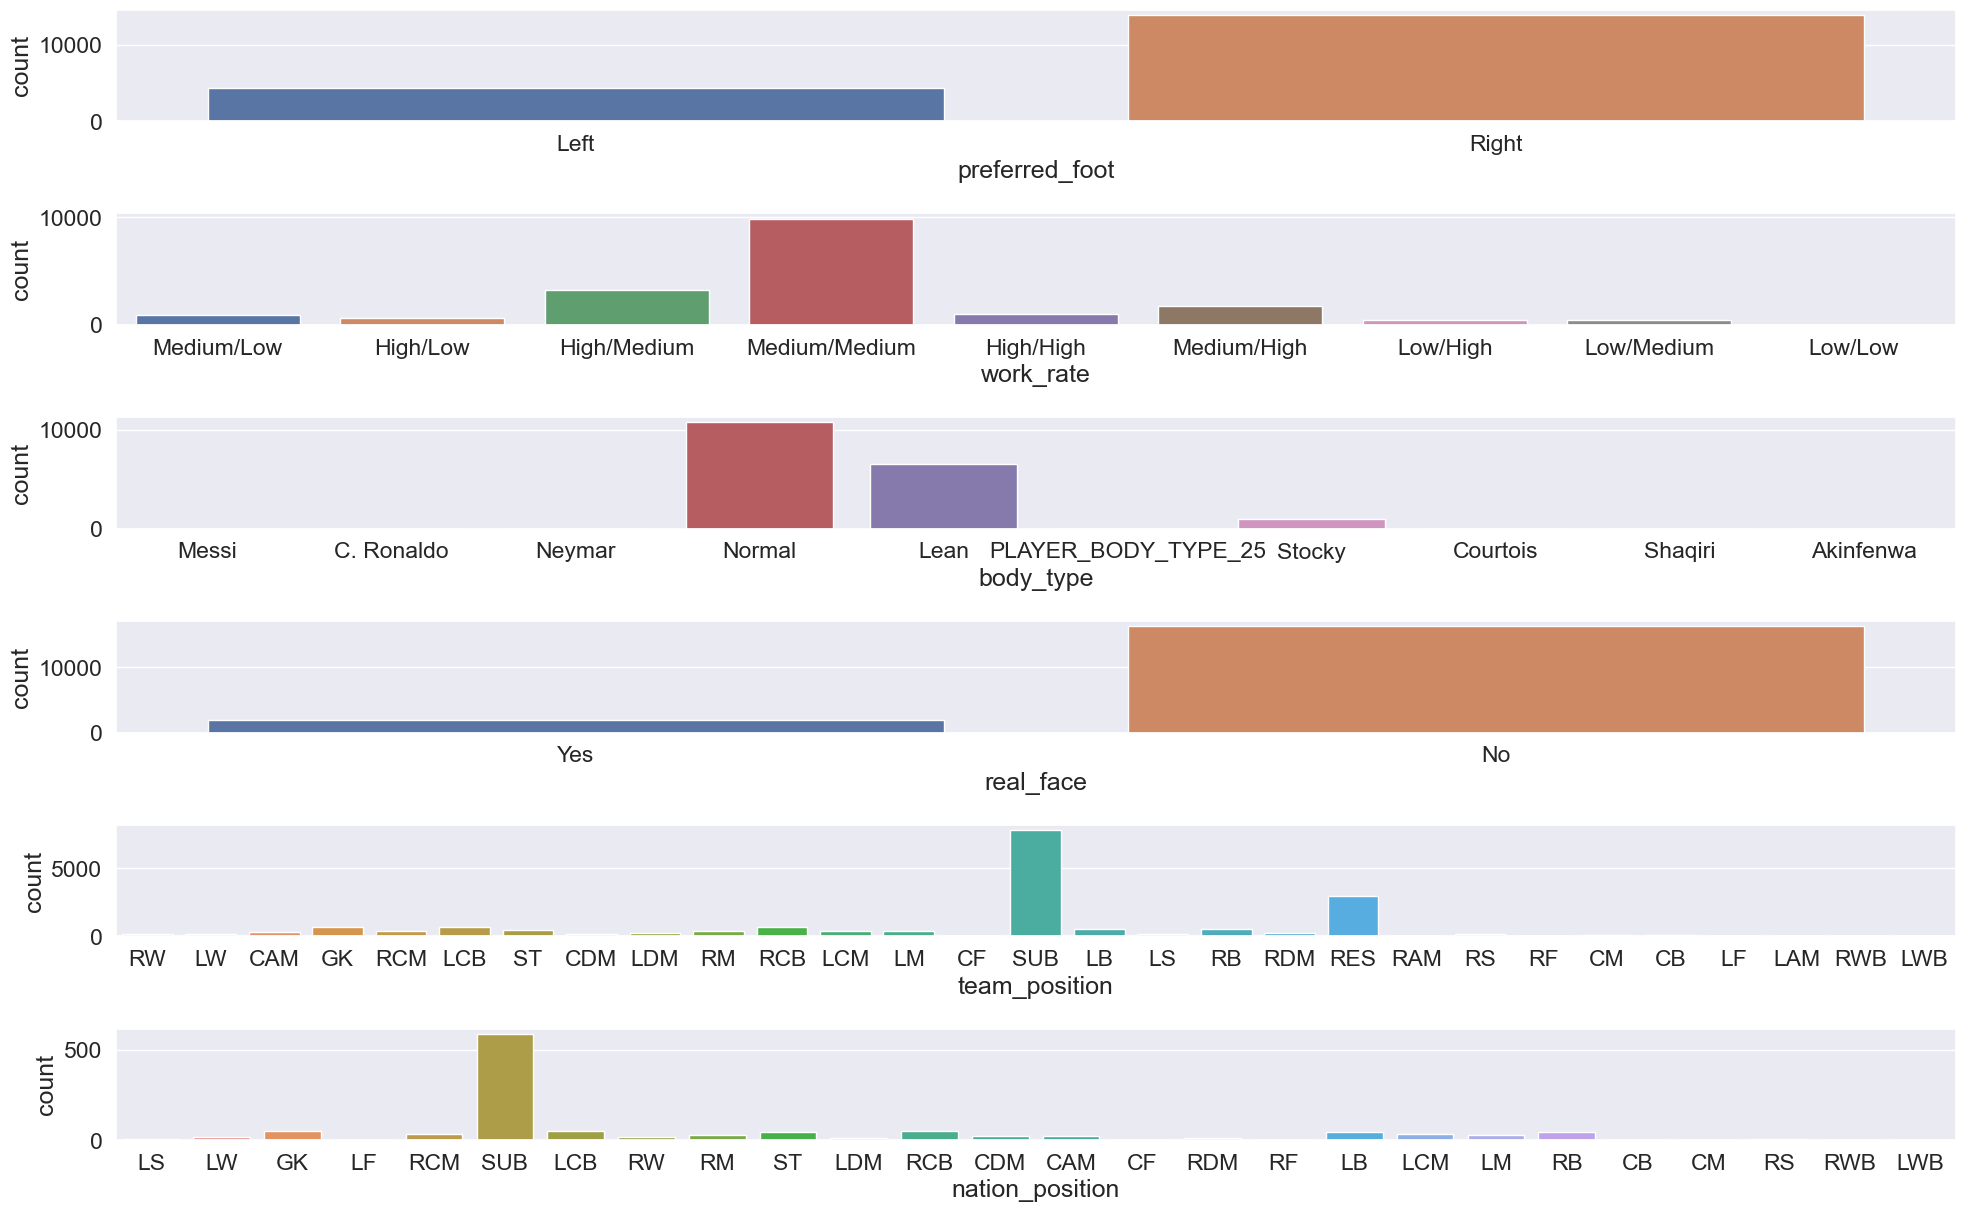

In [21]:
c = data[['preferred_foot', 'work_rate', 'body_type',
        'real_face', 'team_position','nation_position']]
plt.figure(figsize=(20,20))
pn = 1
for i in c:
    if pn < 10:
        sns.set(font_scale=1.5)
        plt.subplot(10,1,pn)
        sns.countplot(x=data[i])
    pn+=1
plt.tight_layout()

### Insights
- All of the numerical features follow normal distribution. Most of them are rigt skewed

## Bivariate

In [22]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

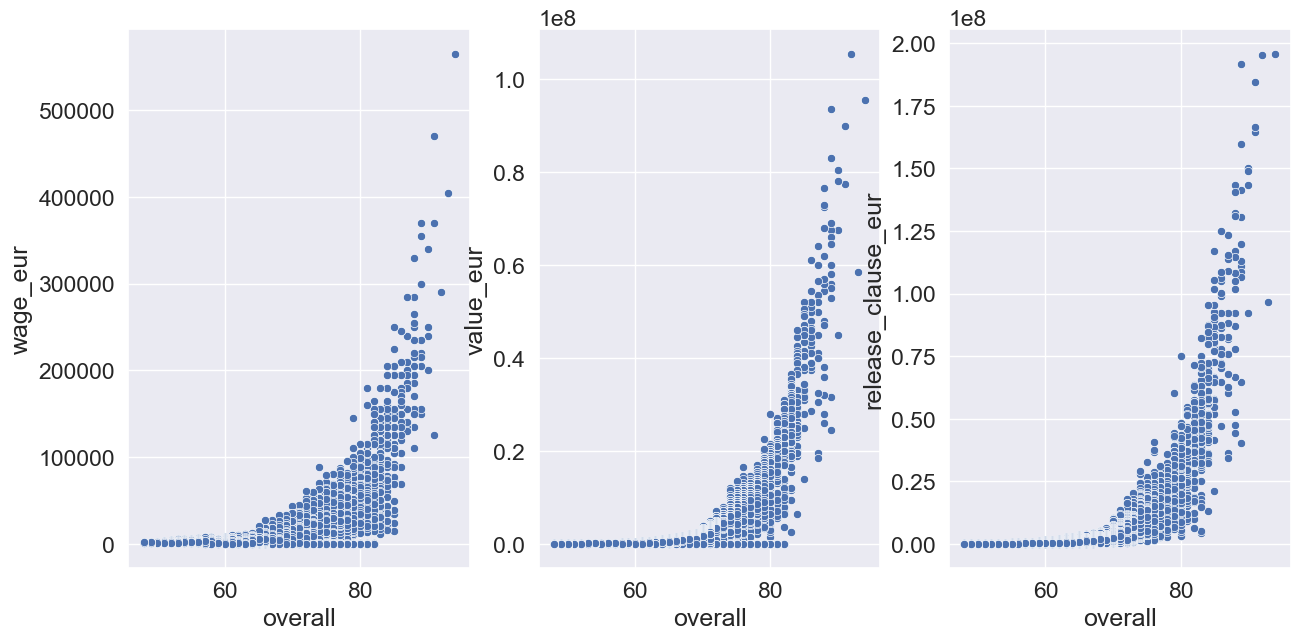

In [23]:
# Player's overall rating vs few monetary features
plt.figure(figsize=(15,7))
plotnumber = 1

data_bivar = ["wage_eur", "value_eur", "release_clause_eur"]

for column in data_bivar:
    if plotnumber <= 3:
        plt.subplot(1,3,plotnumber)
        sns.scatterplot(x="overall", y=column, data=data)
    plotnumber += 1
plt.show()

### Insights 
- In general, a player's wage, value and his release clause value increases as their overall ranking increases

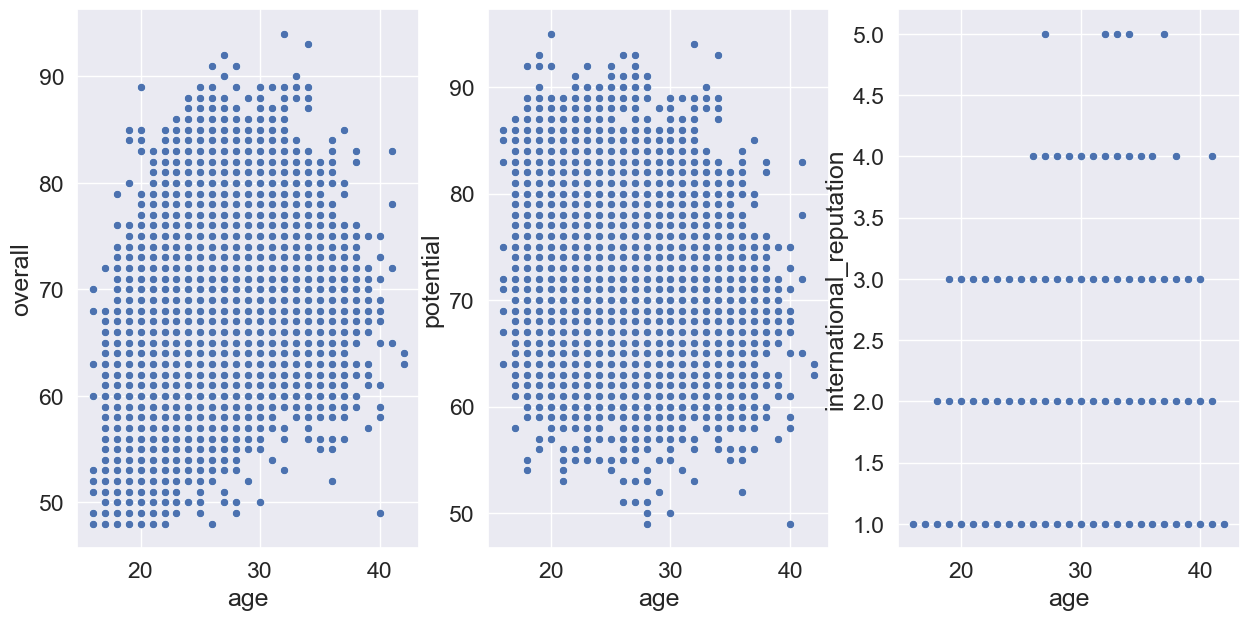

In [24]:
# Player's age vs few skill based ranking features
plt.figure(figsize=(15,7))
plotnumber = 1

data_bivar = ["overall", "potential", "international_reputation"]

for column in data_bivar:
    if plotnumber <= 3:
        plt.subplot(1,3,plotnumber)
        sns.scatterplot(x="age", y=column, data=data)
    plotnumber += 1
plt.show()

### Insights 
- Players aged between 20 and 35 usually possess top tier overall and potential rankings

- Players with reputation ranking 4 and above are less when compared with the reputation 3 or below

- As the player's age increases beyond 35 years, their overall ranking, potential ranking and reputation ranking decreases

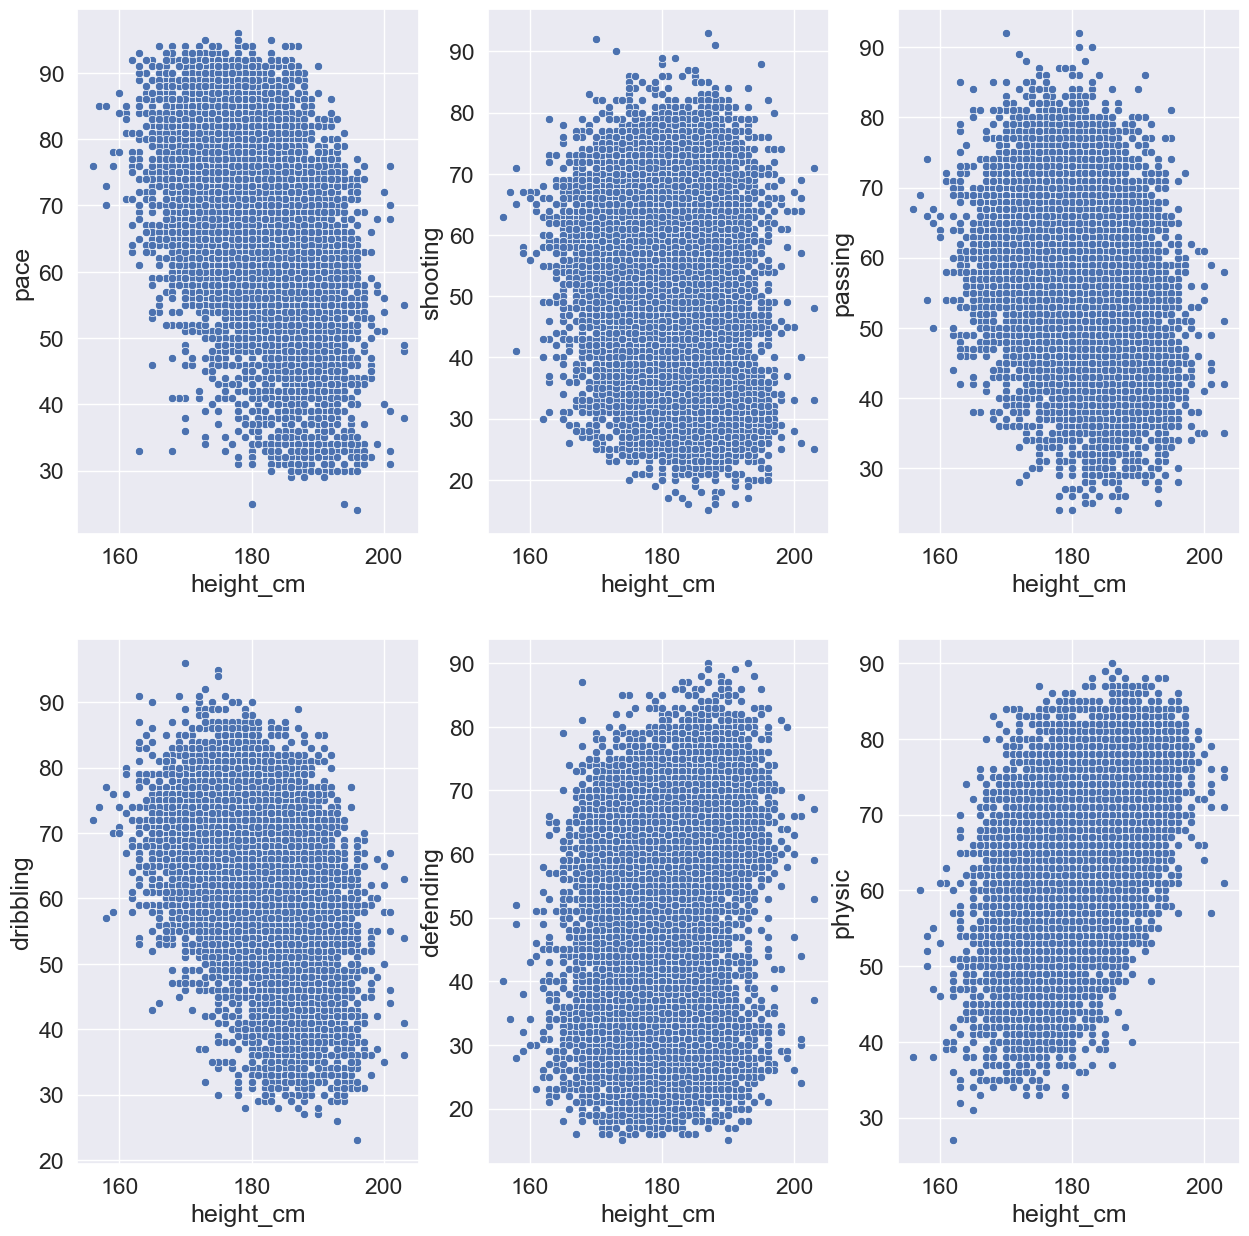

In [25]:
# Players height vs few key skills
plt.figure(figsize=(15,15))
plotnumber = 1

data_bivar = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]

for column in data_bivar:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.scatterplot(x="height_cm", y=column, data=data)
    plotnumber += 1
plt.show()

### Insights
1) As the height of the player increases:

       a) their pace, passing and dribbling skills get decreased(beyond 190 cm)
       b) shooting skill is on high for very few players; otherwise it follows a decline as the hieght increases

2) Players with height between 170 to 200 cm tend to have a good physic ranking and defending skill

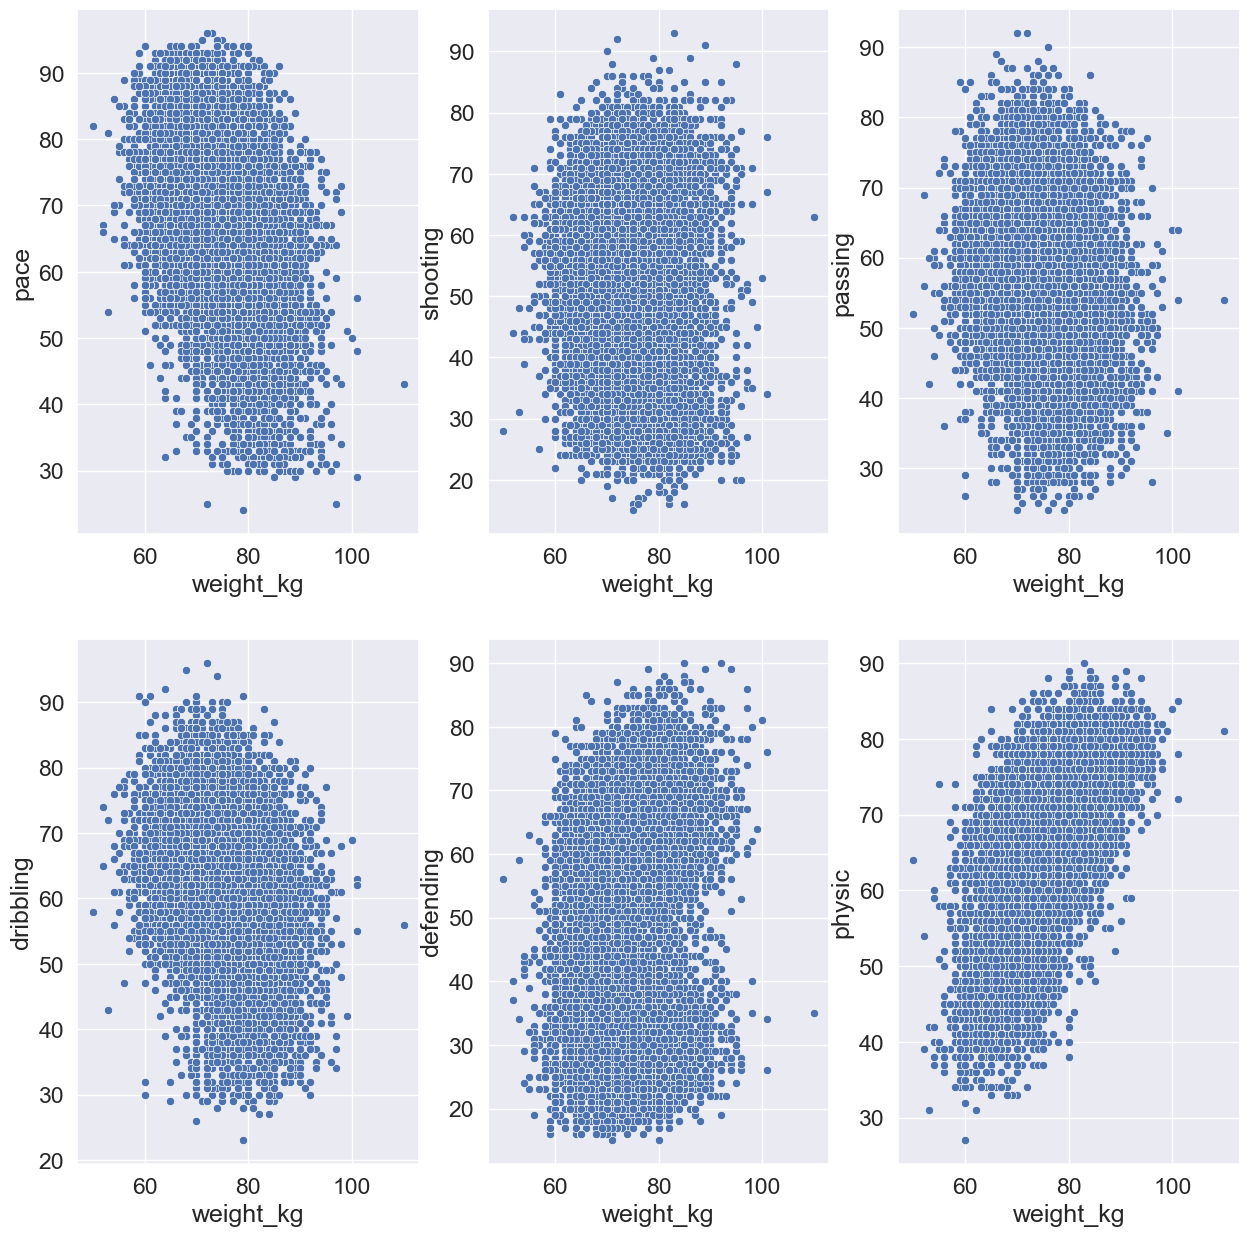

In [26]:
# Players weight vs few key skills
plt.figure(figsize=(15,15))
plotnumber = 1

data_bivar = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]

for column in data_bivar:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.scatterplot(x="weight_kg", y=column, data=data)
    plotnumber += 1
plt.show()

### Insights
- Players with weight 90 kg and above possess low pace and dribbling skills
- Except for few players, players who weigh 90 kg and above possess low dribbling, passing and defending skills 
- Players with weight 90kg and above possess high/good physic ranking

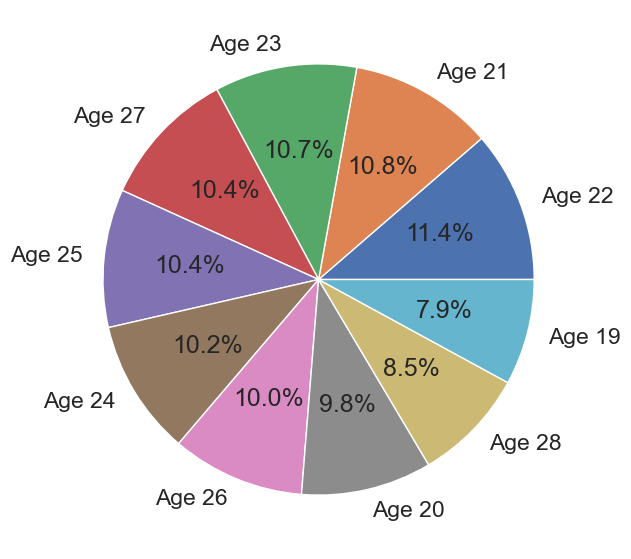

In [27]:
# Top 10 number of players by Age
data_age_group = data.groupby(data["age"]).count()
data_age_group_sorted = data_age_group.sort_values(by=["short_name"], ascending=False)

data_label = []
for age in data_age_group_sorted.head(10).index:
    data_label.append("Age " + str(age))
    
plt.figure(figsize=(7,7))
plt.pie(data_age_group_sorted["short_name"].head(10), labels = data_label, autopct="%.1f%%")
plt.show()

### Insights
- We have more number of players in the age(decreasing order) given below:
22, 21, 23, 27, 25, 24, 26, 20, 28, 19

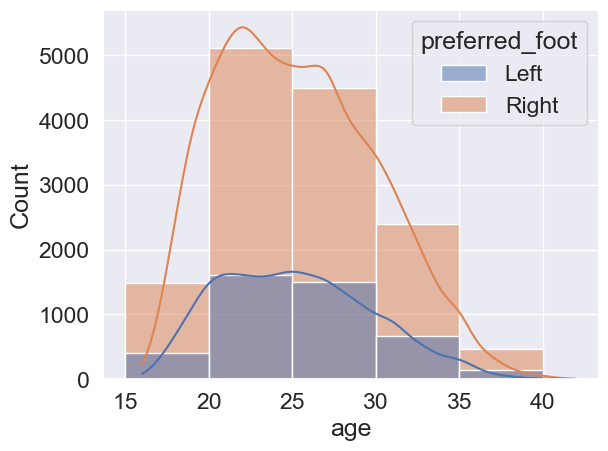

In [28]:
# Player's preferred foot by age
sns.histplot(x="age", data=data, bins=[15,20,25,30,35,40], hue="preferred_foot", kde=True)
plt.show()

### Insights 
- Players with preferred foot as right foot are more than the players with left foot as the preferred foot

In [29]:
# 'sofifa_id'	, 'player_url', 'long_name','player_tags','player_traits',
# 'player_positions' - concat positions
# 'work_rate' - split the column into attacking and Defending
# 'team_jersey_number','nation_jersey_number' - convert float to int
# 'ls'	,'st',	'rs',	'lw',	'lf',	'cf'	,'rf',	'rw',	'lam',	'cam',	'ram',	'lm',	'lcm',	'cm',	'rcm',	'rm',	'lwb',	'ldm',	'cdm',	'rdm',	'rwb',	'lb',	'lcb',	'cb',	'rcb',	'rb'



# Data Preprocessing

In [30]:
data=original.copy()

In [31]:
num_data = data.select_dtypes(include=["int","float"])
num_data.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0     158023   32        170         72       94         94   95500000   
1      20801   34        187         83       93         93   58500000   
2     190871   27        175         68       92         92  105500000   
3     200389   26        188         87       91         93   77500000   
4     183277   28        175         74       91         91   90000000   

   wage_eur  international_reputation  weak_foot  skill_moves  \
0    565000                         5          4            4   
1    405000                         5          4            5   
2    290000                         5          5            5   
3    125000                         3          3            1   
4    470000                         4          4            4   

   release_clause_eur  team_jersey_number  contract_valid_until  \
0         195800000.0                10.0                2021.0   
1          96500000.0                 7.0                2022.0   
2         195200000.0                10.0                2022.0   
3         164700000.0                13.0                2023.0   
4         184500000.0                 7.0                2024.0   

   nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                   NaN  87.0      92.0     92.0       96.0       39.0   
1                   7.0  90.0      93.0     82.0       89.0       35.0   
2                  10.0  91.0      85.0     87.0       95.0       32.0   
3                   1.0   NaN       NaN      NaN        NaN        NaN   
4                  10.0  91.0      83.0     86.0       94.0       35.0   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0    66.0        NaN          NaN         NaN          NaN       NaN   
1    78.0        NaN          NaN         NaN          NaN       NaN   
2    58.0        NaN          NaN         NaN          NaN       NaN   
3     NaN       87.0         92.0        78.0         89.0      52.0   
4    66.0        NaN          NaN         NaN          NaN       NaN   

   gk_positioning  attacking_crossing  attacking_finishing  \
0             NaN                  88                   95   
1             NaN                  84                   94   
2             NaN                  87                   87   
3            90.0                  13                   11   
4             NaN                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87 

## Miising/Null Values

In [32]:
pd.reset_option('display.max_rows',None)

In [33]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [34]:
for i in num_data:
  data.loc[data[i].isnull() == True,i] = data[i].median()

In [35]:
for i in cat_data:
  data.loc[data[i].isnull() == True,i] = data[i].mode()[0]

In [36]:
data.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

## Duplicated

In [37]:
data.duplicated().sum()

0

## Drop Irrelevant column

In [38]:
data_column_del = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club','overall',
                      'potential', 'value_eur', 'wage_eur', 'preferred_foot','international_reputation', 'weak_foot',
                      'skill_moves', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position',
                      'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
                      'nation_jersey_number', 'player_traits', 'goalkeeping_diving', 'goalkeeping_handling', 
                      'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [39]:
data.drop(data_column_del,axis=1,inplace=True)

In [40]:
data

age  height_cm  weight_kg player_positions      work_rate  pace  \
0       32        170         72       RW, CF, ST     Medium/Low  87.0   
1       34        187         83           ST, LW       High/Low  90.0   
2       27        175         68          LW, CAM    High/Medium  91.0   
3       26        188         87               GK  Medium/Medium  69.0   
4       28        175         74           LW, CF    High/Medium  91.0   
...    ...        ...        ...              ...            ...   ...   
18273   22        186         79               CB    Medium/High  57.0   
18274   22        177         66               CB  Medium/Medium  58.0   
18275   19        186         75               CM     Low/Medium  54.0   
18276   18        185         74               CM        Low/Low  59.0   
18277   26        182         78               CM  Medium/Medium  60.0   

       shooting  passing  dribbling  defending  physic  gk_diving  \
0          92.0     92.0       96.0       39.0    66.0       65.0   
1          93.0     82.0       89.0       35.0    78.0       65.0   
2          85.0     87.0       95.0       32.0    58.0       65.0   
3          54.0     58.0       64.0       56.0    66.0       87.0   
4          83.0     86.0       94.0       35.0    66.0       65.0   
...         ...      ...        ...        ...     ...        ...   
18273      23.0     28.0       33.0       47.0    51.0       65.0   
18274      24.0     33.0       35.0       48.0    48.0       65.0   
18275      35.0     44.0       45.0       48.0    51.0       65.0   
18276      35.0     47.0       47.0       45.0    52.0       65.0   
18277      32.0     51.0       45.0       47.0    55.0       65.0   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0             63.0        61.0         66.0      39.0            64.0   
1             63.0        61.0         66.0      39.0            64.0   
2             63.0        61.0         66.0      39.0            64.0   
3             92.0        78.0         89.0      52.0            90.0   
4             63.0        61.0         66.0      39.0            64.0   
...            ...         ...          ...       ...             ...   
18273         63.0        61.0         66.0      39.0            64.0   
18274         63.0        61.0         66.0      39.0            64.0   
18275         63.0        61.0         66.0      39.0            64.0   
18276         63.0        61.0         66.0      39.0            64.0   
18277         63.0        61.0         66.0      39.0            64.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                      88                   95                          70   
1                      84                   94                          89   
2                      87                   87                          62   
3                      13                   11                          15   
4                      81                   84                          61   
...                   ...                  ...                         ...   
18273                  21                   17                          40   
18274                  24                   20                          42   
18275                  32                   33                          49   
18276                  39                   34                          47   
18277                  44                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                           92                 88               97   
1                           83                 87               89   
2                           87                 87               96   
3                           43                 13               12   
4                           89                 83               95   
...                        ...                ...      

In [41]:
data[['work_rate_overall', 'work_rate_potential']] = data['work_rate'].str.split('/', expand=True)
data.drop('work_rate',axis=1,inplace=True)

In [42]:
data.head()

age  height_cm  weight_kg player_positions  pace  shooting  passing  \
0   32        170         72       RW, CF, ST  87.0      92.0     92.0   
1   34        187         83           ST, LW  90.0      93.0     82.0   
2   27        175         68          LW, CAM  91.0      85.0     87.0   
3   26        188         87               GK  69.0      54.0     58.0   
4   28        175         74           LW, CF  91.0      83.0     86.0   

   dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0       96.0       39.0    66.0       65.0         63.0        61.0   
1       89.0       35.0    78.0       65.0         63.0        61.0   
2       95.0       32.0    58.0       65.0         63.0        61.0   
3       64.0       56.0    66.0       87.0         92.0        78.0   
4       94.0       35.0    66.0       65.0         63.0        61.0   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         66.0      39.0            64.0                  88   
1         66.0      39.0            64.0                  84   
2         66.0      39.0            64.0                  87   
3         89.0      52.0            90.0                  13   
4         66.0      39.0            64.0                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
3                     60                67                  88   
4                     88                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
3              78                12                    34   
4              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                  

In [43]:
data.dtypes

age                      int64
height_cm                int64
weight_kg                int64
player_positions        object
pace                   float64
                        ...   
cb                      object
rcb                     object
rb                      object
work_rate_overall       object
work_rate_potential     object
Length: 73, dtype: object

In [44]:
columns_to_process = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'
]

for column in columns_to_process:
    # Split the values based on '+'
    data[column] = data[column].str.split('+').str[0]

    # Convert the column to integers
    data[column] = data[column].astype('int64')

In [45]:
data.head()

age  height_cm  weight_kg player_positions  pace  shooting  passing  \
0   32        170         72       RW, CF, ST  87.0      92.0     92.0   
1   34        187         83           ST, LW  90.0      93.0     82.0   
2   27        175         68          LW, CAM  91.0      85.0     87.0   
3   26        188         87               GK  69.0      54.0     58.0   
4   28        175         74           LW, CF  91.0      83.0     86.0   

   dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0       96.0       39.0    66.0       65.0         63.0        61.0   
1       89.0       35.0    78.0       65.0         63.0        61.0   
2       95.0       32.0    58.0       65.0         63.0        61.0   
3       64.0       56.0    66.0       87.0         92.0        78.0   
4       94.0       35.0    66.0       65.0         63.0        61.0   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         66.0      39.0            64.0                  88   
1         66.0      39.0            64.0                  84   
2         66.0      39.0            64.0                  87   
3         89.0      52.0            90.0                  13   
4         66.0      39.0            64.0                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
3                     60                67                  88   
4                     88                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
3              78                12                    34   
4              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                  

In [46]:
len(data.columns)

73

## Outliers

In [47]:
num_data = data.select_dtypes(include=["int","float"])
num_data.head()

age  height_cm  weight_kg  pace  shooting  passing  dribbling  defending  \
0   32        170         72  87.0      92.0     92.0       96.0       39.0   
1   34        187         83  90.0      93.0     82.0       89.0       35.0   
2   27        175         68  91.0      85.0     87.0       95.0       32.0   
3   26        188         87  69.0      54.0     58.0       64.0       56.0   
4   28        175         74  91.0      83.0     86.0       94.0       35.0   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0    66.0       65.0         63.0        61.0         66.0      39.0   
1    78.0       65.0         63.0        61.0         66.0      39.0   
2    58.0       65.0         63.0        61.0         66.0      39.0   
3    66.0       87.0         92.0        78.0         89.0      52.0   
4    66.0       65.0         63.0        61.0         66.0      39.0   

   gk_positioning  attacking_crossing  attacking_finishing  \
0            64.0                  88                   95   
1            64.0                  84                   94   
2            64.0                  87                   87   
3            90.0                  13                   11   
4            64.0                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   
2                96                  92                84                80   
3                67                  88                49                59   
4                95                  90                94                82   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81              49                84   
3             78             41              78                12   
4             56             84              63                80   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   
2                    51                       36                     87   
3                    34                       19                     11   
4                    54                       41                     87   

   mentality_vision  mentality_penalties  ment

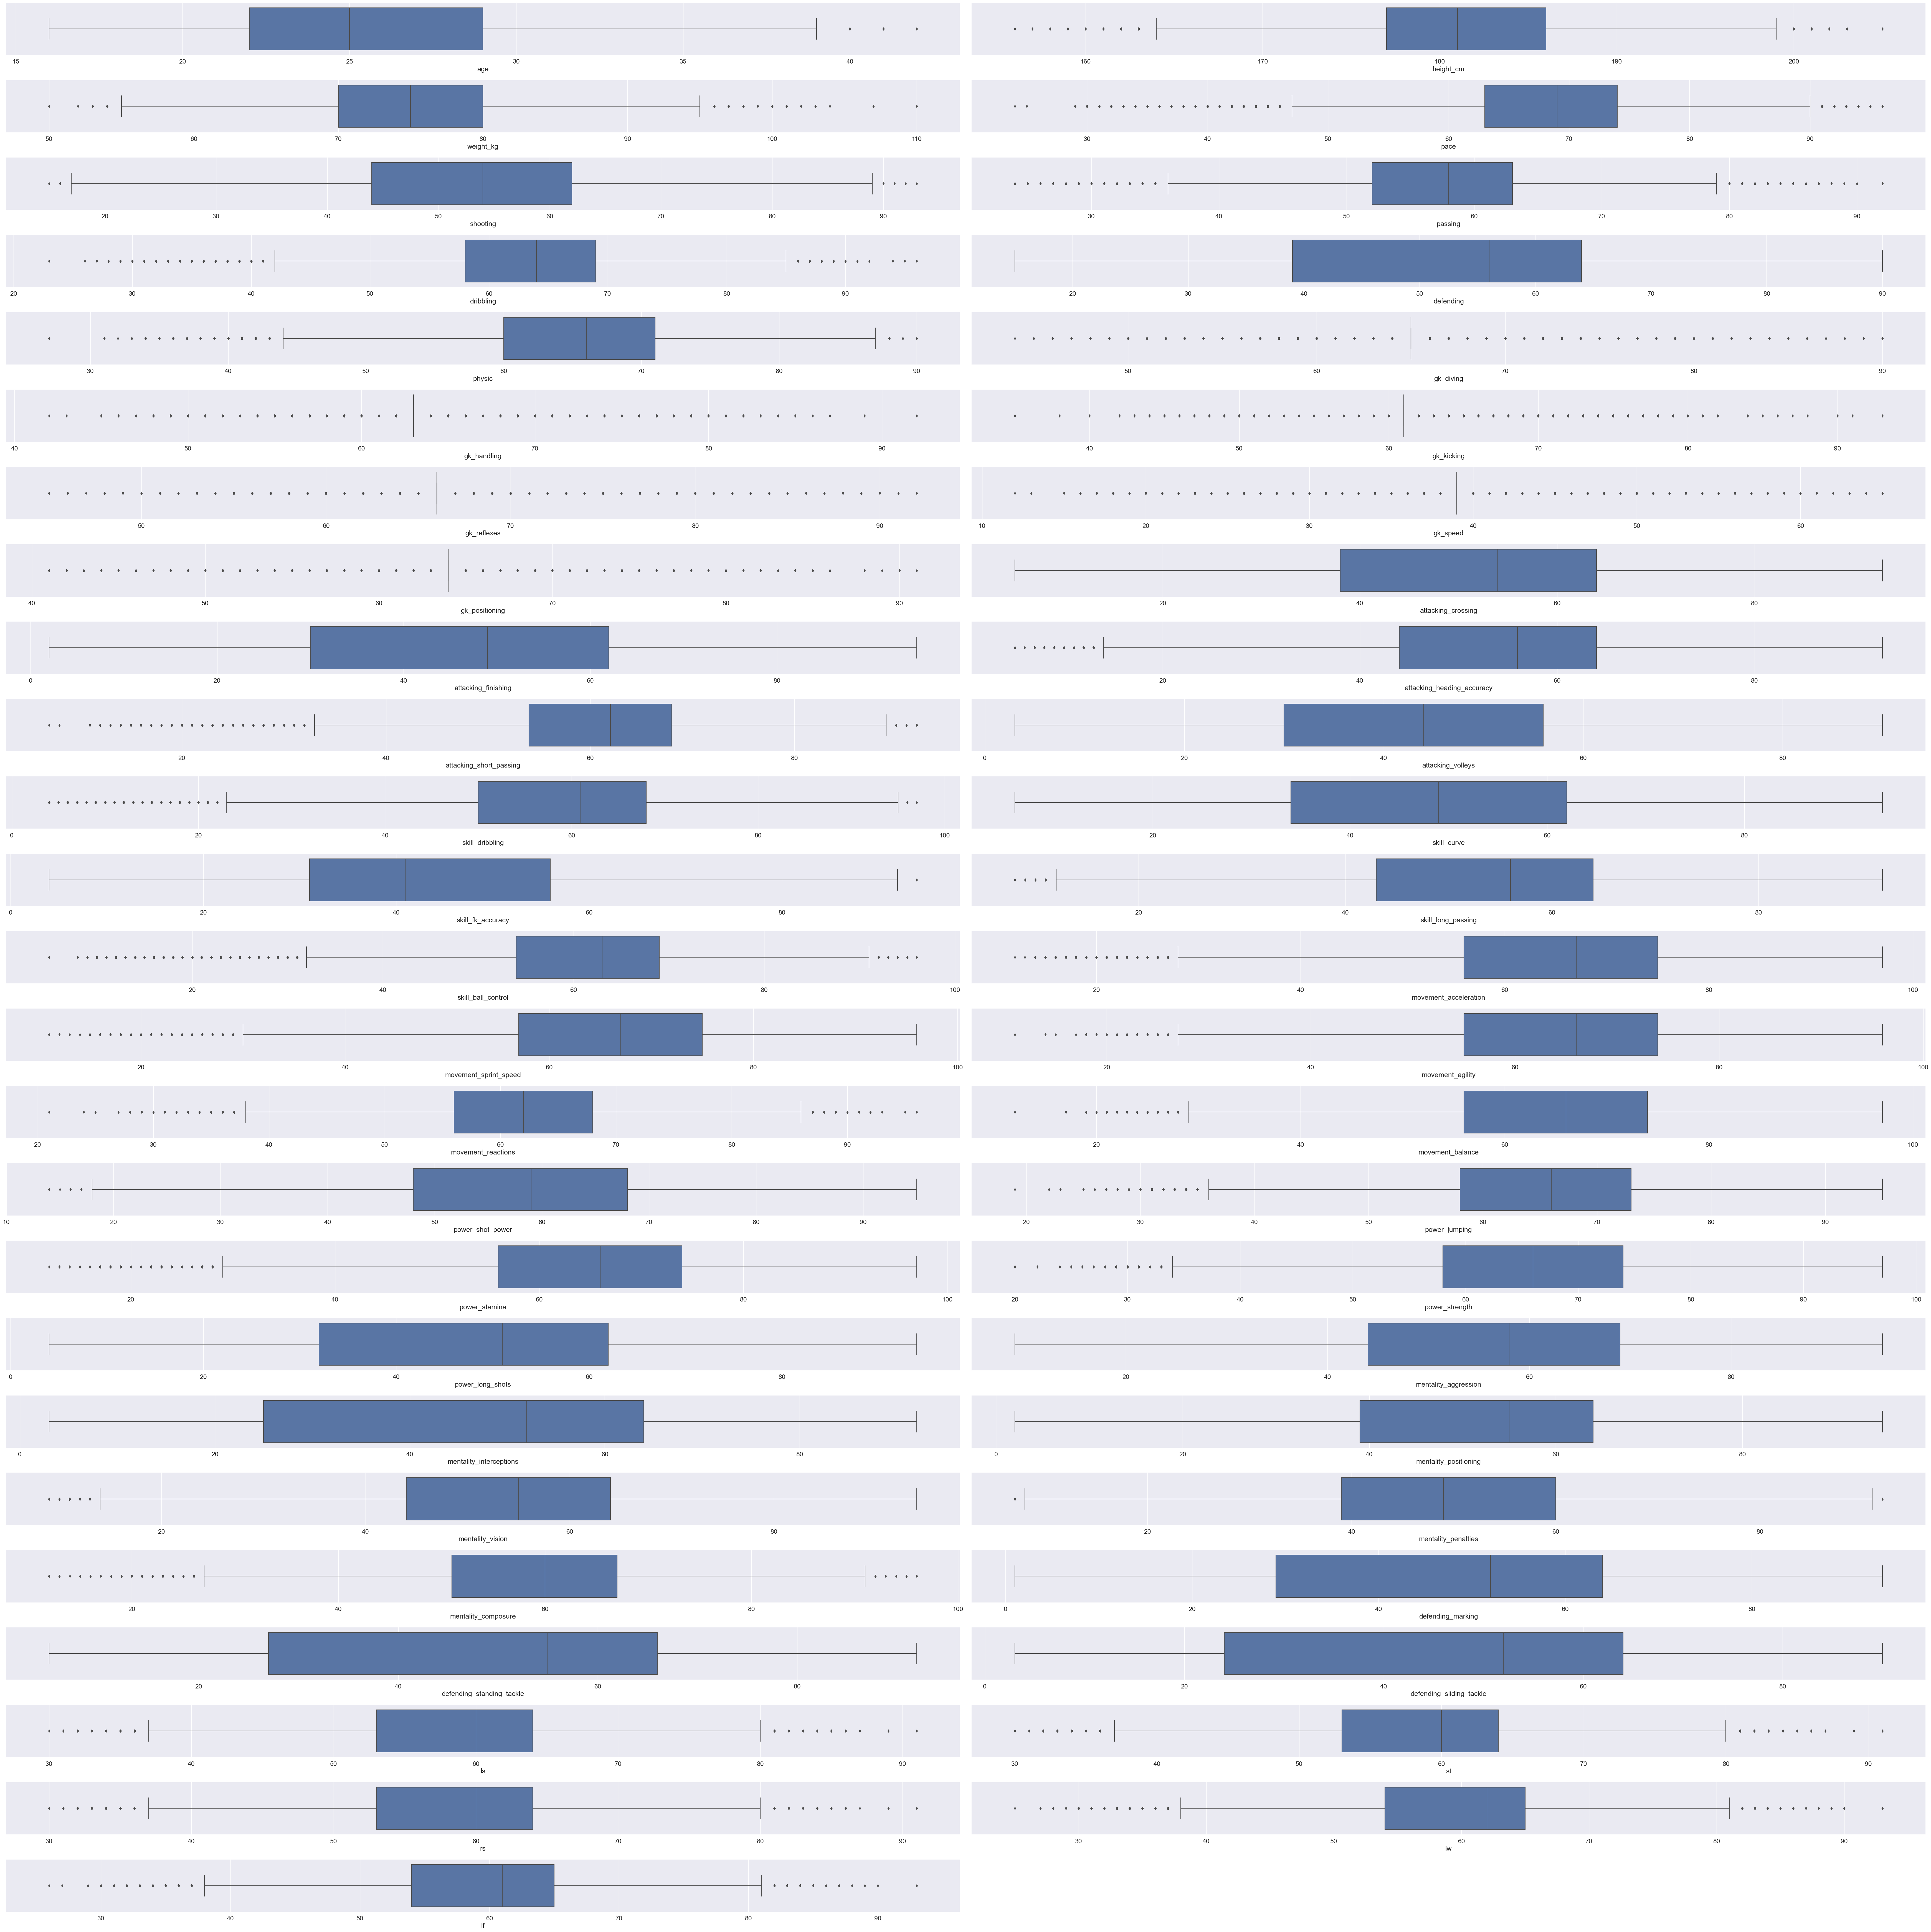

In [48]:
plt.figure(figsize=(70,70))
pn = 1
for i in num_data:
    if pn < 50:
        sns.set(font_scale=1.5)
        plt.subplot(25,2,pn)
        sns.boxplot(x=data[i])
    pn+=1
plt.tight_layout()

-

In [49]:
# 'age','height_cm','weight_kg','overall','potential','contract_valid_until'
num_data = data.select_dtypes(include=["int","float"])
num_data

age  height_cm  weight_kg  pace  shooting  passing  dribbling  \
0       32        170         72  87.0      92.0     92.0       96.0   
1       34        187         83  90.0      93.0     82.0       89.0   
2       27        175         68  91.0      85.0     87.0       95.0   
3       26        188         87  69.0      54.0     58.0       64.0   
4       28        175         74  91.0      83.0     86.0       94.0   
...    ...        ...        ...   ...       ...      ...        ...   
18273   22        186         79  57.0      23.0     28.0       33.0   
18274   22        177         66  58.0      24.0     33.0       35.0   
18275   19        186         75  54.0      35.0     44.0       45.0   
18276   18        185         74  59.0      35.0     47.0       47.0   
18277   26        182         78  60.0      32.0     51.0       45.0   

       defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0           39.0    66.0       65.0         63.0        61.0         66.0   
1           35.0    78.0       65.0         63.0        61.0         66.0   
2           32.0    58.0       65.0         63.0        61.0         66.0   
3           56.0    66.0       87.0         92.0        78.0         89.0   
4           35.0    66.0       65.0         63.0        61.0         66.0   
...          ...     ...        ...          ...         ...          ...   
18273       47.0    51.0       65.0         63.0        61.0         66.0   
18274       48.0    48.0       65.0         63.0        61.0         66.0   
18275       48.0    51.0       65.0         63.0        61.0         66.0   
18276       45.0    52.0       65.0         63.0        61.0         66.0   
18277       47.0    55.0       65.0         63.0        61.0         66.0   

       gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
0          39.0            64.0                  88                   95   
1          39.0            64.0                  84                   94   
2          39.0            64.0                  87                   87   
3          52.0            90.0                  13                   11   
4          39.0            64.0                  81                   84   
...         ...             ...                 ...                  ...   
18273      39.0            64.0                  21                   17   
18274      39.0            64.0                  24                   20   
18275      39.0            64.0                  32                   33   
18276      39.0            64.0                  39                   34   
18277      39.0            64.0                  44                   30   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                              70                       92                 88   
1                              89                       83                 87   
2                              62                       87                 87   
3                              15                       43                 13   
4                              61                       89                 83   
...                           ...                      ...                ...   
18273                          40                       35                 27   
18274                          42                       43                 28   
18275                          49                       53                 32   
18276                          47                       54                 28   
18277                          48                       58                 25   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0                   97           93                 94                  92   
1                   89           81                 76                  77   
2                   96           88                 87                  81   
3                  

In [50]:
# IQR
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [51]:
per_outliers = (num_data<lower_limit).sum() / len(data) * 100 + (num_data>upper_limit).sum() / len(data) * 100
per_outliers[per_outliers < 5]

age                          0.103950
height_cm                    0.486924
weight_kg                    0.399387
shooting                     0.049240
passing                      3.085677
dribbling                    4.453441
defending                    0.000000
physic                       2.368968
attacking_crossing           0.000000
attacking_finishing          0.000000
attacking_volleys            0.000000
skill_curve                  0.000000
skill_fk_accuracy            0.005471
skill_long_passing           0.071124
movement_acceleration        2.215779
movement_sprint_speed        2.730058
movement_agility             1.143451
movement_reactions           0.880840
movement_balance             1.356822
power_shot_power             0.021884
power_jumping                2.330671
power_strength               1.455301
power_long_shots             0.000000
mentality_aggression         0.000000
mentality_interceptions      0.000000
mentality_positioning        0.000000
mentality_vi

In [52]:
per_outliers.index

Index(['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 

In [53]:
c = data[['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [54]:
for i in c:
    lower_limit_value = lower_limit[i]
    data.loc[data[i] < lower_limit_value,i] = data[i].median()

In [55]:
for i in c:
    upper_limit_value = upper_limit[i]
    data.loc[data[i] > upper_limit_value,i] = data[i].median()

In [56]:
num_data = data.select_dtypes(include=["int","float"])
num_data.head()

age  height_cm  weight_kg  pace  shooting  passing  dribbling  defending  \
0   32        170         72  87.0      54.0     58.0       64.0       39.0   
1   34        187         83  90.0      54.0     58.0       64.0       35.0   
2   27        175         68  69.0      85.0     58.0       64.0       32.0   
3   26        188         87  69.0      54.0     58.0       64.0       56.0   
4   28        175         74  69.0      83.0     58.0       64.0       35.0   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0    66.0       65.0         63.0        61.0         66.0      39.0   
1    78.0       65.0         63.0        61.0         66.0      39.0   
2    58.0       65.0         63.0        61.0         66.0      39.0   
3    66.0       87.0         92.0        78.0         89.0      52.0   
4    66.0       65.0         63.0        61.0         66.0      39.0   

   gk_positioning  attacking_crossing  attacking_finishing  \
0            64.0                  88                   95   
1            64.0                  84                   94   
2            64.0                  87                   87   
3            90.0                  13                   11   
4            64.0                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       62                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               61           93                 41                  92   
1               89           81                 76                  77   
2               61           88                 87                  81   
3               61           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  63                     91                     84   
1                  63                     89                     91   
2                  63                     94                     89   
3                  63                     43                     60   
4                  63                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  62                95                86   
1                87                  62                71                95   
2                96                  62                84                80   
3                67                  62                49                59   
4                95                  62                94                82   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81              49                84   
3             78             41              78                12   
4             56             84              63                80   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   
2                    51                       36                     87   
3                    34                       19                     11   
4                    54                       41                     87   

   mentality_vision  mentality_penalties  ment

In [57]:
per_outliers = (num_data<lower_limit).sum() / len(data) * 100 + (num_data>upper_limit).sum() / len(data) * 100
per_outliers[per_outliers < 5]

age          0.0
height_cm    0.0
weight_kg    0.0
pace         0.0
shooting     0.0
            ... 
lb           0.0
lcb          0.0
cb           0.0
rcb          0.0
rb           0.0
Length: 64, dtype: float64

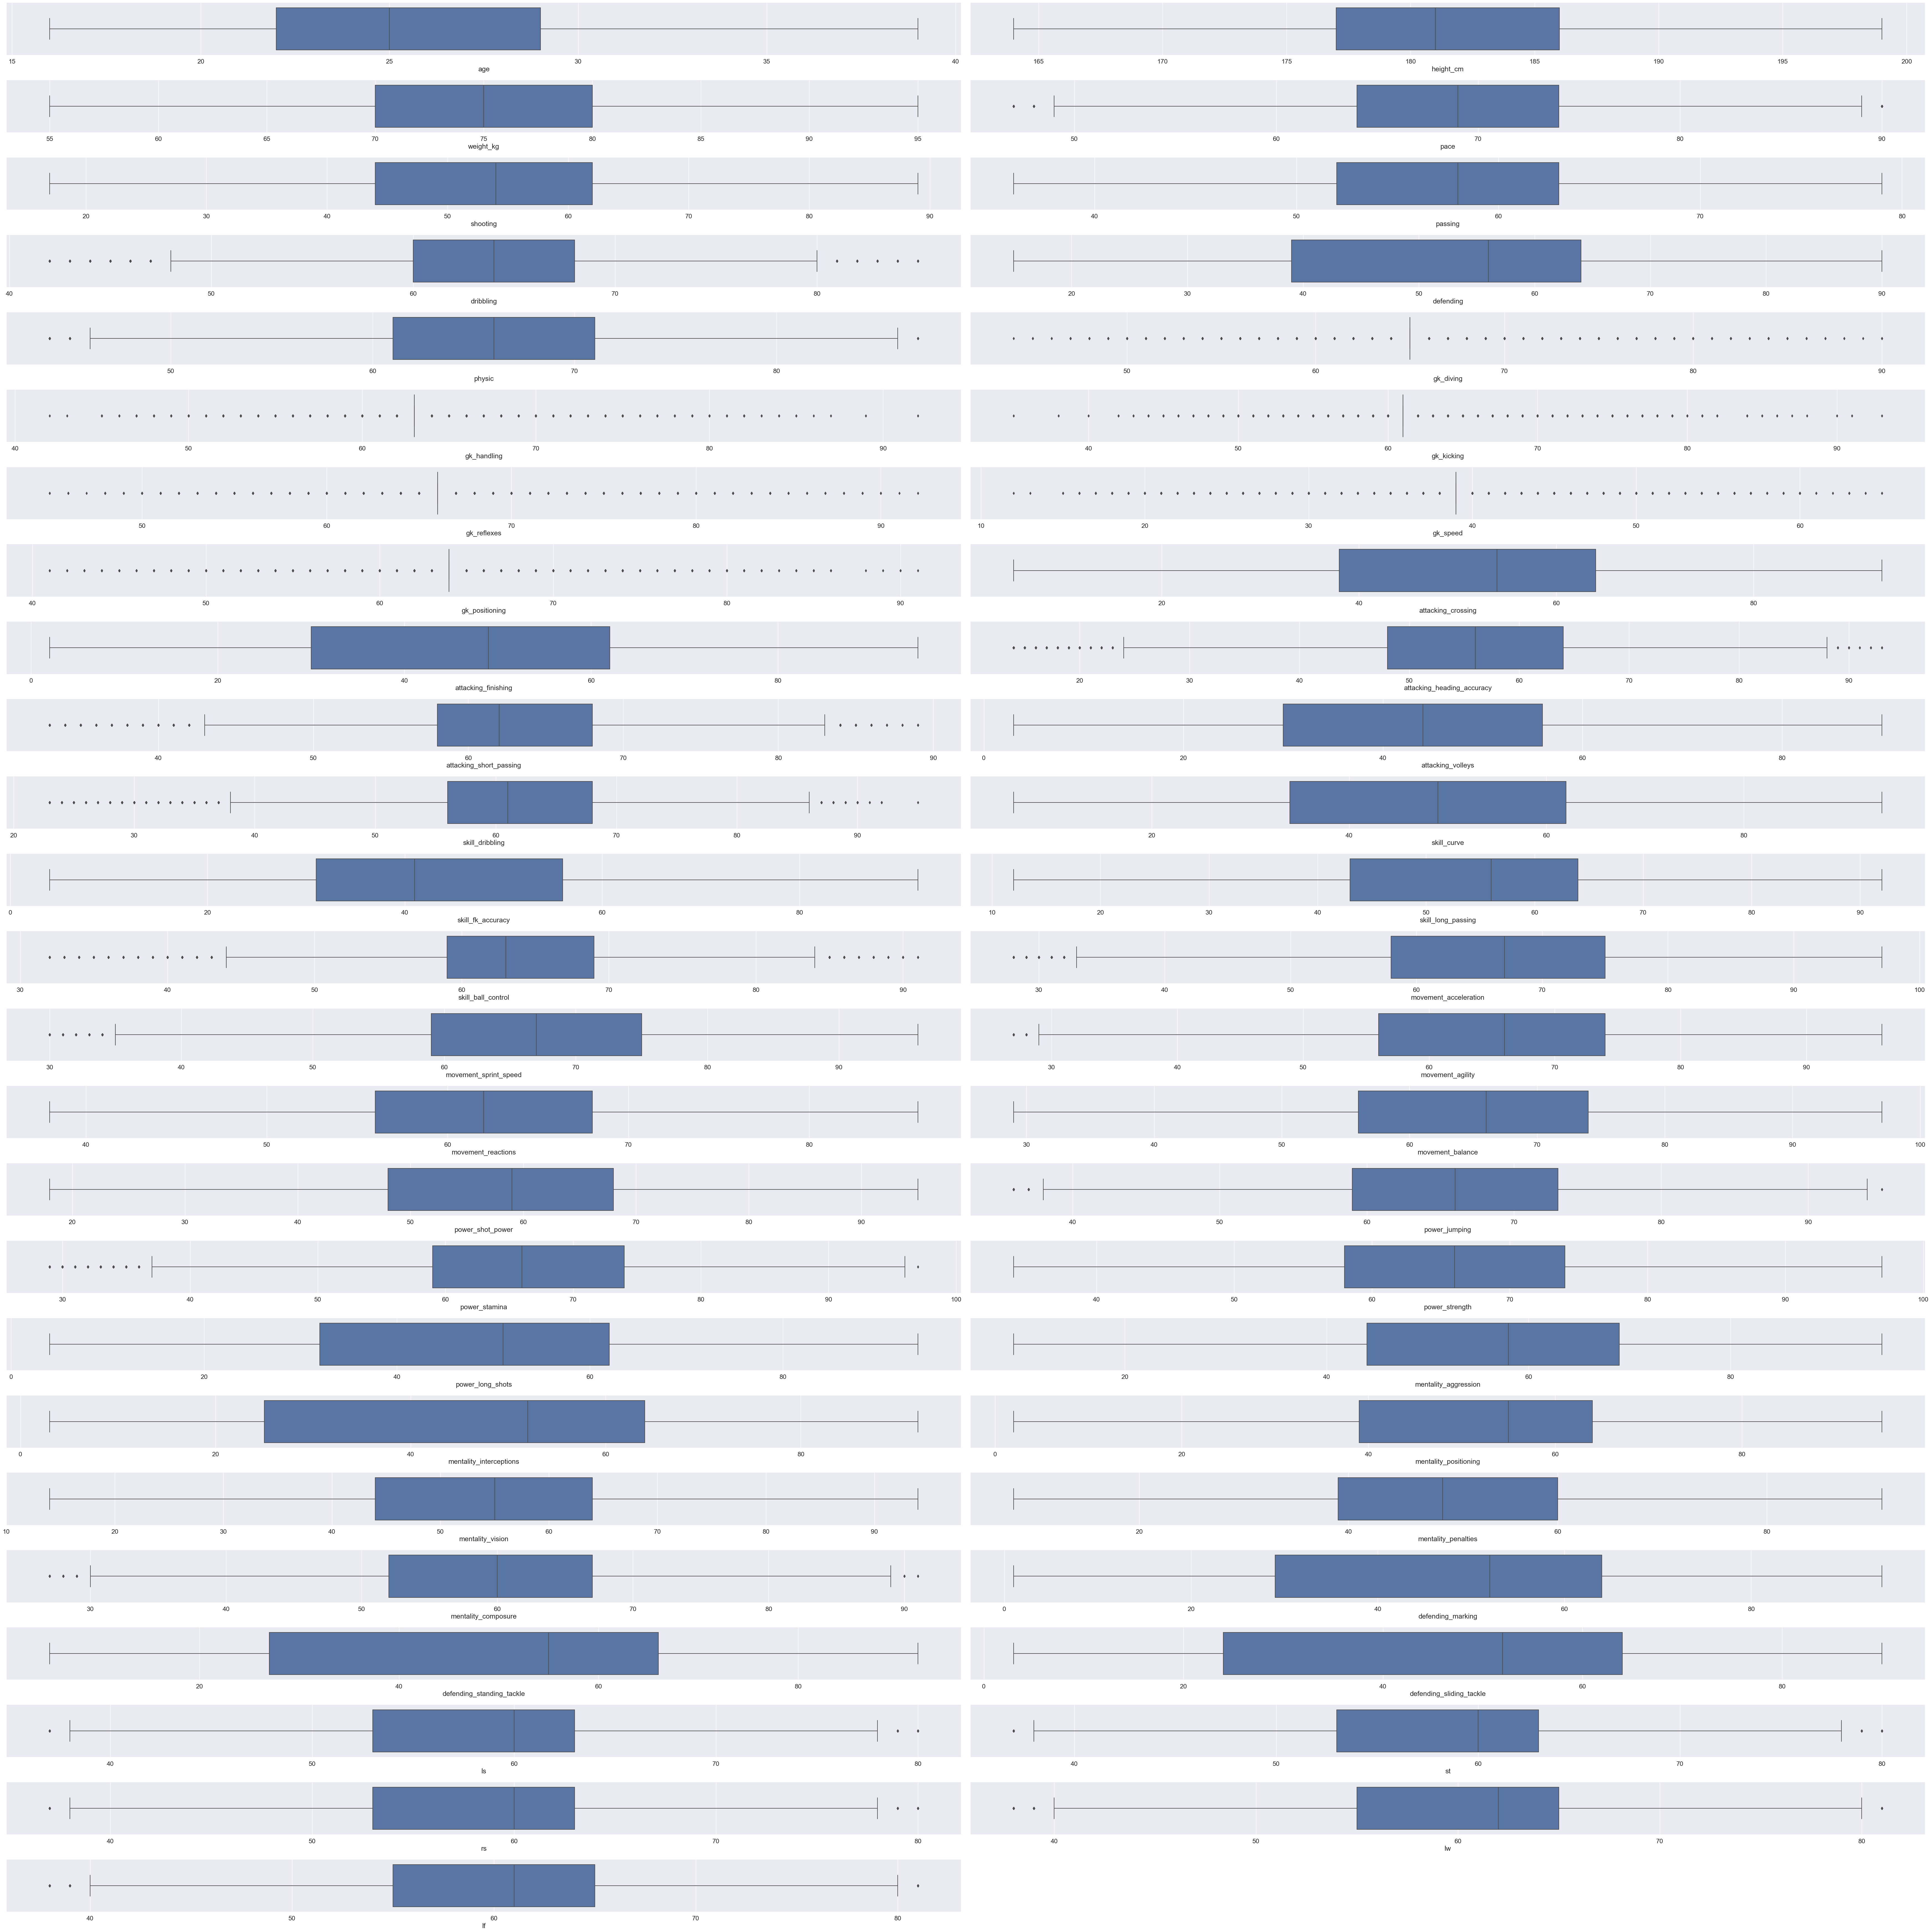

In [58]:
plt.figure(figsize=(70,70))
pn = 1
for i in num_data:
    if pn < 50:
        sns.set(font_scale=1.5)
        plt.subplot(25,2,pn)
        sns.boxplot(x=data[i])
    pn+=1
plt.tight_layout()

## Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [60]:
df = data.copy()

In [61]:
df.head()

age  height_cm  weight_kg player_positions  pace  shooting  passing  \
0   32        170         72       RW, CF, ST  87.0      54.0     58.0   
1   34        187         83           ST, LW  90.0      54.0     58.0   
2   27        175         68          LW, CAM  69.0      85.0     58.0   
3   26        188         87               GK  69.0      54.0     58.0   
4   28        175         74           LW, CF  69.0      83.0     58.0   

   dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0       64.0       39.0    66.0       65.0         63.0        61.0   
1       64.0       35.0    78.0       65.0         63.0        61.0   
2       64.0       32.0    58.0       65.0         63.0        61.0   
3       64.0       56.0    66.0       87.0         92.0        78.0   
4       64.0       35.0    66.0       65.0         63.0        61.0   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         66.0      39.0            64.0                  88   
1         66.0      39.0            64.0                  84   
2         66.0      39.0            64.0                  87   
3         89.0      52.0            90.0                  13   
4         66.0      39.0            64.0                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       62   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               61           93                 41   
1                 87               89           81                 76   
2                 87               61           88                 87   
3                 13               61           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  63                     91   
1                  77                  63                     89   
2                  81                  63                     94   
3                  40                  63                     43   
4                  83                  63                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  62   
1                     91                87                  62   
2                     89                96                  62   
3                     60                67                  62   
4                     88                95                  62   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
3              78                12                    34   
4              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                  

In [62]:
num_data.columns

Index(['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 

In [63]:
s = df.drop(['player_positions','work_rate_overall','work_rate_potential'],axis=1)

In [64]:
df[['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']] = scale.fit_transform(s)

In [65]:
df.head()

age  height_cm  weight_kg player_positions      pace  shooting  \
0  0.695652   0.171429      0.425       RW, CF, ST  0.930233  0.513889   
1  0.782609   0.657143      0.700           ST, LW  1.000000  0.513889   
2  0.478261   0.314286      0.325          LW, CAM  0.511628  0.944444   
3  0.434783   0.685714      0.800               GK  0.511628  0.513889   
4  0.521739   0.314286      0.475           LW, CF  0.511628  0.916667   

    passing  dribbling  defending    physic  gk_diving  gk_handling  \
0  0.511628   0.511628   0.320000  0.511628   0.456522         0.42   
1  0.511628   0.511628   0.266667  0.790698   0.456522         0.42   
2  0.511628   0.511628   0.226667  0.325581   0.456522         0.42   
3  0.511628   0.511628   0.546667  0.511628   0.934783         1.00   
4  0.511628   0.511628   0.266667  0.511628   0.456522         0.42   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0    0.448276     0.446809  0.509434            0.46            0.943182   
1    0.448276     0.446809  0.509434            0.46            0.897727   
2    0.448276     0.446809  0.509434            0.46            0.931818   
3    0.741379     0.936170  0.754717            0.98            0.090909   
4    0.448276     0.446809  0.509434            0.46            0.863636   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0             1.000000                    0.708861                 0.517857   
1             0.989247                    0.949367                 0.892857   
2             0.913978                    0.607595                 0.964286   
3             0.096774                    0.012658                 0.178571   
4             0.881720                    0.594937                 1.000000   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0           0.977011         0.527778     0.988636           0.420455   
1           0.965517         0.916667     0.852273           0.818182   
2           0.965517         0.527778     0.931818           0.943182   
3           0.114943         0.527778     0.079545           0.113636   
4           0.919540         1.000000     0.875000           0.852273   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0              1.0000            0.525424               0.913043   
1              0.8125            0.525424               0.884058   
2              0.8625            0.525424               0.956522   
3              0.3500            0.525424               0.217391   
4              0.8875            0.525424               0.956522   

   movement_sprint_speed  movement_agility  movement_reactions  \
0               0.818182          0.956522                 0.5   
1               0.924242          0.869565                 0.5   
2               0.893939          1.000000                 0.5   
3               0.454545          0.579710                 0.5   
4               0.878788          0.985507                 0.5   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.970588          0.883117       0.542373       0.676471   
1          0.617647          1.000000       1.000000       0.823529   
2          0.808824          0.805195       0.423729       0.764706   
3          0.294118          0.532468       0.711864       0.176471   
4          0.955882          0.831169       0.338983       0.808824   

   power_strength  power_long_shots  mentality_aggression  \
0        0.539683          1.000000              0.453488   
1        0.698413          0.988889              0.627907   
2        0.238095          0.888889              0.488372   
3        0.698413          0.088889              0.290698   
4        0.460317          0.844444              0.523256   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                 0.415730               0.989247            1.0000   
1                 0.292

## Encoding

In [66]:
cat_data = data.select_dtypes(include=["object"])
cat_data.head(3)

player_positions work_rate_overall work_rate_potential
0       RW, CF, ST            Medium                 Low
1           ST, LW              High                 Low
2          LW, CAM              High              Medium

### Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['player_positions'] = le.fit_transform(df['player_positions'])
df['work_rate_overall'] = le.fit_transform(df['work_rate_overall'])
df['work_rate_potential'] = le.fit_transform(df['work_rate_potential'])

In [68]:
df.head()

age  height_cm  weight_kg  player_positions      pace  shooting  \
0  0.695652   0.171429      0.425               544  0.930233  0.513889   
1  0.782609   0.657143      0.700               620  1.000000  0.513889   
2  0.478261   0.314286      0.325               344  0.511628  0.944444   
3  0.434783   0.685714      0.800               226  0.511628  0.513889   
4  0.521739   0.314286      0.475               350  0.511628  0.916667   

    passing  dribbling  defending    physic  gk_diving  gk_handling  \
0  0.511628   0.511628   0.320000  0.511628   0.456522         0.42   
1  0.511628   0.511628   0.266667  0.790698   0.456522         0.42   
2  0.511628   0.511628   0.226667  0.325581   0.456522         0.42   
3  0.511628   0.511628   0.546667  0.511628   0.934783         1.00   
4  0.511628   0.511628   0.266667  0.511628   0.456522         0.42   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0    0.448276     0.446809  0.509434            0.46            0.943182   
1    0.448276     0.446809  0.509434            0.46            0.897727   
2    0.448276     0.446809  0.509434            0.46            0.931818   
3    0.741379     0.936170  0.754717            0.98            0.090909   
4    0.448276     0.446809  0.509434            0.46            0.863636   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0             1.000000                    0.708861                 0.517857   
1             0.989247                    0.949367                 0.892857   
2             0.913978                    0.607595                 0.964286   
3             0.096774                    0.012658                 0.178571   
4             0.881720                    0.594937                 1.000000   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0           0.977011         0.527778     0.988636           0.420455   
1           0.965517         0.916667     0.852273           0.818182   
2           0.965517         0.527778     0.931818           0.943182   
3           0.114943         0.527778     0.079545           0.113636   
4           0.919540         1.000000     0.875000           0.852273   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0              1.0000            0.525424               0.913043   
1              0.8125            0.525424               0.884058   
2              0.8625            0.525424               0.956522   
3              0.3500            0.525424               0.217391   
4              0.8875            0.525424               0.956522   

   movement_sprint_speed  movement_agility  movement_reactions  \
0               0.818182          0.956522                 0.5   
1               0.924242          0.869565                 0.5   
2               0.893939          1.000000                 0.5   
3               0.454545          0.579710                 0.5   
4               0.878788          0.985507                 0.5   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.970588          0.883117       0.542373       0.676471   
1          0.617647          1.000000       1.000000       0.823529   
2          0.808824          0.805195       0.423729       0.764706   
3          0.294118          0.532468       0.711864       0.176471   
4          0.955882          0.831169       0.338983       0.808824   

   power_strength  power_long_shots  mentality_aggression  \
0        0.539683          1.000000              0.453488   
1        0.698413          0.988889              0.627907   
2        0.238095          0.888889              0.488372   
3        0.698413          0.088889              0.290698   
4        0.460317          0.844444              0.523256   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                 0.415730               0.989247            1.0000   
1                

In [69]:
len(df.columns)

73

# Feature Engineering

## Dimentionality Reduction

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df)
data_pca = pd.DataFrame(data=pca_result, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                                    'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [72]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      279.674884  0.441960 -0.027446  1.254554  0.088274 -0.931197 -0.198700   
1      355.676894  1.528511  0.739529 -0.012825 -0.302247 -0.388606  0.390859   
2       79.678459  1.435235 -0.278753 -1.080244  0.170018 -0.811096  0.090099   
3      -38.325961 -0.910996 -0.561348  0.061926 -0.036532  1.111501 -0.053559   
4       85.678249  1.532311 -0.297433 -0.967008  0.016217 -0.727733  0.200575   
...           ...       ...       ...       ...       ...       ...       ...   
18273 -209.325393 -0.605702  1.034463  0.452654  1.528805  0.491094 -0.294664   
18274 -209.324753 -1.008692 -0.421428 -0.537051  0.723346  0.065144 -0.308316   
18275 -109.325726 -1.184613  0.832184 -1.287611 -0.026389 -0.325921  0.111404   
18276 -109.325799 -0.813911  1.420233 -0.761721  0.439880 -0.198895 -0.068717   
18277 -109.326707 -1.627731  0.430559 -0.509245  0.027511 -0.530233  0.040517   

            PC8       PC9      PC10  
0     -0.090902  0.331548 -0.589477  
1     -0.410932  0.224554 -0.613645  
2      0.162066  0.071037 -0.621681  
3     -0.159564  0.586955 -0.099768  
4      0.059446  0.122419 -0.759135  
...         ...       ...       ...  
18273 -0.040806 -0.139974  0.822863  
18274  0.074701 -0.032590  0.831539  
18275  0.380896 -0.148762 -0.000565  
18276  0.321643 -0.136176 -0.021078  
18277  0.266285  0.146388 -0.079380  

[18278 rows x 10 columns]

# Model Creation

In [73]:
from sklearn.cluster import KMeans

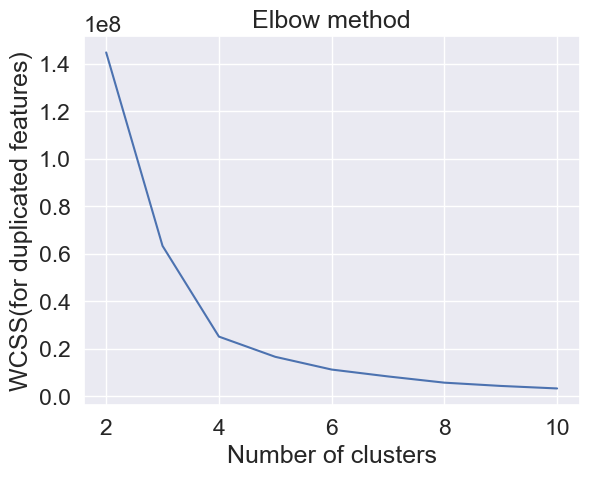

In [136]:
wcss_dup_fea = []
for cluster in range(2,11):
    kme_clu_dup_fea = KMeans(n_clusters=cluster, random_state=42)
    kme_clu_dup_fea.fit(df)
    wcss_dup_fea.append(kme_clu_dup_fea.inertia_)

plt.plot(range(2,11), wcss_dup_fea)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS(for duplicated features)")
plt.show()

In [134]:
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_assignments = kmeans_model.fit_predict(df)
    
    # Calculate silhouette score
    silhouette = silhouette_score(df, cluster_assignments)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette}")

Silhouette Score for 2 clusters: 0.6992400598863476
Silhouette Score for 3 clusters: 0.6733235687474672
Silhouette Score for 4 clusters: 0.7086112702461436
Silhouette Score for 5 clusters: 0.6942408842861753
Silhouette Score for 6 clusters: 0.7007623361549666
Silhouette Score for 7 clusters: 0.7166916619106302
Silhouette Score for 8 clusters: 0.702556196828351
Silhouette Score for 9 clusters: 0.7380459878321297
Silhouette Score for 10 clusters: 0.7293080894950419
Silhouette Score for 11 clusters: 0.7387747726848022
Silhouette Score for 12 clusters: 0.7295680671759246
Silhouette Score for 13 clusters: 0.7317958684302545
Silhouette Score for 14 clusters: 0.7313603708755789
Silhouette Score for 15 clusters: 0.7168521479887254
Silhouette Score for 16 clusters: 0.7121736529745978
Silhouette Score for 17 clusters: 0.7015433125467015
Silhouette Score for 18 clusters: 0.696649319380267
Silhouette Score for 19 clusters: 0.696299534081024


In [ ]:
df['cluster'] = cluster_assignments

# Explore the clusters
cluster_summary = df.groupby('cluster').mean()
cluster_summary

### WIth PCA

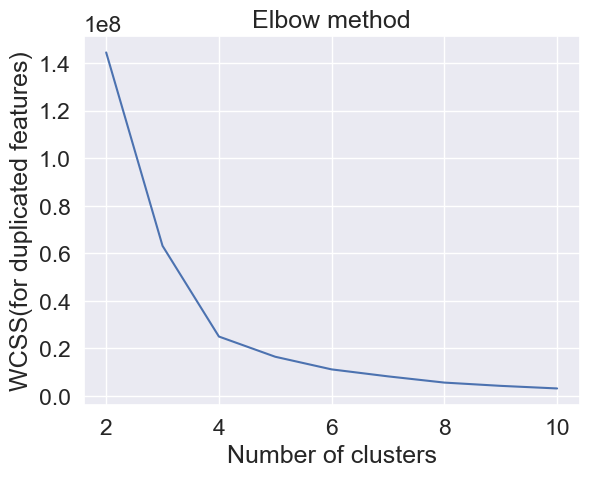

In [92]:
wcss_dup_fea = []
for cluster in range(2,11):
    kme_clu_dup_fea = KMeans(n_clusters=cluster, random_state=42)
    kme_clu_dup_fea.fit(data_pca)
    wcss_dup_fea.append(kme_clu_dup_fea.inertia_)

plt.plot(range(2,11), wcss_dup_fea)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS(for duplicated features)")
plt.show()

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already scaled the features
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_assignments = kmeans_model.fit_predict(df)
    
    # Calculate silhouette score
    silhouette = silhouette_score(df, cluster_assignments)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette}")


Silhouette Score for 2 clusters: 0.6992400598863476
Silhouette Score for 3 clusters: 0.6733235687474672
Silhouette Score for 4 clusters: 0.7086112702461436
Silhouette Score for 5 clusters: 0.6942408842861753
Silhouette Score for 6 clusters: 0.7007623361549666
Silhouette Score for 7 clusters: 0.7166916619106302
Silhouette Score for 8 clusters: 0.702556196828351
Silhouette Score for 9 clusters: 0.7380459878321297
Silhouette Score for 10 clusters: 0.7293080894950419
Silhouette Score for 11 clusters: 0.7387747726848022
Silhouette Score for 12 clusters: 0.7295680671759246
Silhouette Score for 13 clusters: 0.7317958684302545
Silhouette Score for 14 clusters: 0.7313603708755789
Silhouette Score for 15 clusters: 0.7168521479887254
Silhouette Score for 16 clusters: 0.7121736529745978
Silhouette Score for 17 clusters: 0.7015433125467015
Silhouette Score for 18 clusters: 0.696649319380267
Silhouette Score for 19 clusters: 0.696299534081024


In [140]:
cluster_assignments

array([ 9, 13, 18, ...,  1,  1,  1])

In [137]:
df['cluster'] = cluster_assignments

# Explore the clusters
cluster_summary = df.groupby('cluster').mean()
cluster_summary

age  height_cm  weight_kg  player_positions      pace  shooting  \
cluster                                                                         
0        0.404535   0.542207   0.558902        595.377358  0.501389  0.661043   
1        0.334618   0.421785   0.429152        154.763339  0.452328  0.535619   
2        0.384190   0.412100   0.439894        397.178056  0.605009  0.407657   
3        0.424864   0.624001   0.604204         54.970174  0.364730  0.290893   
4        0.425124   0.606605   0.592573        225.629977  0.527850  0.476256   
5        0.385017   0.368926   0.400815        455.576375  0.637143  0.513323   
6        0.396478   0.364092   0.394572        318.158664  0.689129  0.604268   
7        0.367848   0.364818   0.388376          9.724138  0.519052  0.589698   
8        0.441524   0.480011   0.497957         97.436397  0.398264  0.495022   
9        0.361384   0.381797   0.422446        526.045699  0.685484  0.607938   
10       0.361732   0.357432   0.384211        276.959514  0.636004  0.564384   
11       0.353829   0.379211   0.405597        562.895522  0.684918  0.619248   
12       0.425276   0.433013   0.451684        172.665285  0.437788  0.570078   
13       0.394619   0.477660   0.498316        624.936170  0.643988  0.668144   
14       0.435698   0.401429   0.441053        428.650000  0.610282  0.421053   
15       0.392229   0.375319   0.397340        485.597872  0.669075  0.587707   
16       0.405345   0.521729   0.518826         81.720488  0.385441  0.349917   
17       0.414995   0.399821   0.434290        251.219207  0.624897  0.426670   
18       0.338983   0.375787   0.409661        346.338983  0.674182  0.627354   

          passing  dribbling  defending    physic  gk_diving  gk_handling  \
cluster                                                                     
0        0.381544   0.497992   0.209457  0.516072   0.456522     0.420000   
1        0.598587   0.532642   0.508170  0.437437   0.456522     0.420000   
2        0.495624   0.505070   0.568341  0.485843   0.456522     0.420000   
3        0.362588   0.343898   0.649894  0.605215   0.456522     0.420000   
4        0.513830   0.506703   0.571156  0.509091   0.462777     0.421994   
5        0.546393   0.565149   0.408174  0.414484   0.456522     0.420000   
6        0.600816   0.643152   0.310369  0.361412   0.456522     0.420000   
7        0.638254   0.611817   0.355877  0.340094   0.456522     0.420000   
8        0.604738   0.511585   0.666914  0.623329   0.456522     0.420000   
9        0.551700   0.611090   0.291434  0.381345   0.456522     0.420000   
10       0.573769   0.587045   0.345722  0.353733   0.456522     0.420000   
11       0.570982   0.641704   0.294478  0.392832   0.456522     0.420000   
12       0.679841   0.593565   0.607696  0.542764   0.456522     0.420000   
13       0.473734   0.579828   0.226359  0.474353   0.456522     0.420000   
14       0.538739   0.530294   0.648000  0.532069   0.456522     0.420000   
15       0.593716   0.616131   0.345957  0.386739   0.456522     0.420000   
16       0.441040   0.378751   0.644595  0.576662   0.456522     0.420000   
17       0.550566   0.532602   0.635129  0.504928   0.456522     0.420000   
18       0.563027   0.637367   0.262554  0.371068   0.456522     0.420000   

         gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
cluster                                                      
0          0.448276     0.446809  0.509434        0.460000   
1          0.448276     0.446809  0.509434        0.460000   
2          0.448276     0.446809  0.509434        0.460000   
3          0.448276     0.446809  0.509434        0.460000   
4          0.458053     0.452468  0.493994        0.451482   
5          0.448276     0.446809  0.509434        0.460000   
6          0.448276     0.446809  0.509434        0.460000   
7          0.448276     0.446809  0.509434        0.460000   
8          0.448276     0.446809  0.509434        0.460000   
9          0

In [ ]:
selected_features = df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                        'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                        'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                        'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                        'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                        'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
                        'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                        'work_rate_overall', 'work_rate_potential',
                        'age', 'height_cm', 'weight_kg']]

In [139]:
# Assuming you have a DataFrame named 'df' with a 'cluster' column
sns.scatterplot(x='pace', y='dribbling', hue='cluster', data=df)
plt.title('Clustering Visualization')
plt.show()

ValueError: Could not interpret value `cluster[3]` for parameter `hue`

In [125]:
sil = silhouette_score(selected_features, cluster_assignments)
sil

0.24249466342772952